<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex01/Beatrice_Silva_de_Almeida/Beatrice_Silva_de_Almeida_Exerc%C3%ADcios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [ ]:
print('Meu nome é: Beatrice Silva de Almeida')

# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [ ]:
from collections import Counter

def top_k(L, k):
  #Utilizando Counter para encontrar as frequencias mais comuns
    f_kmax = dict(Counter(L).most_common(n=k))
    return f_kmax




Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [ ]:
from collections import Counter
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L,k=k)
print(f'resultado: {resultado}')

resultado: {'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [ ]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000


In [ ]:
%%timeit
resultado = top_k(L=L, k=k)

1 loop, best of 5: 570 ms per loop


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [ ]:
from re import findall

def tokens_to_ids(text, vocabulary):
    #Primeiro separar a string consirando pontuações
    palavra = findall(r'\w+|\S', text)
    #identificando quando for unknown
    unk = vocabulary['unknown']
    #correlacionando  identificador com o dicionário
    id = [vocabulary.get(p.lower(),unk) for p in palavra]
    return id


Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [ ]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 2.81 s per loop


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [ ]:
from random import randint
def sample(path: str, k: int):
    smpls = [None] * k
    for i, l in enumerate(open(path,'r')):
      if i < k:
        smpls[i] = l[:-1]
      else:
        j = randint(0,i)
        if j < k:
          smpls[j] = l[:-1]
    return smpls


Mostre que sua implementação está correta com um exemplo pequeno:

In [ ]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 0', 'line 37', 'line 2', 'line 38', 'line 64', 'line 98', 'line 68', 'line 65', 'line 94', 'line 34']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [ ]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:
- número de somas: (n-1) *m *p 
- número de multiplicações:m *n *p 

## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [ ]:
import numpy as np

In [ ]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
# Calculando a média dos valores de cada linha
med = A.mean(axis = 1)
print (med)

[ 2.5  8.5 14.5 20.5]


## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [ ]:
# Extraindo max e min da matriz A
A_max = A.max()
A_min = A.min()
#Calculando a normalização (Matriz C)
C = (A - A_min) /(A_max - A_min)
print (C)

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [ ]:
# Extrair max e min de cada coluna separadamente ao invés da matriz inteira
c_max = A.max(axis=0)
c_min = A.min(axis=0)
#Calculando a normalização das colunas
C = (A - c_min) / (c_max - c_min)
print(C)

[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [ ]:
# Extrair o max e min de cada linha separadamente
l_max = A.max(axis=1).reshape(-1,1)
l_min = A.min(axis=1).reshape(-1,1)
#Calculando a normalização das linhas
C = (A - l_min) / (l_max - l_min)
print(C)

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [ ]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    # Para contornar o problema de estouro da exponencial será subtraído o valor máximo de cada item do array
    r_max = np.max(A,axis =1, keepdims=True)
    e_A = np.exp(A-r_max)
    soma = np.sum(e_A, axis=1, keepdims=True)
    soft = e_A/soma
    return soft

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [ ]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [ ]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [ ]:
%%timeit
softmax(A)

1 loop, best of 5: 292 ms per loop


In [ ]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [ ]:
import numpy as np
def one_hot(y, n_classes):
    
    input = np.array([y]).reshape(-1)
    one_hot = np.eye(n_classes)[input]
    return one_hot


In [ ]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)
print(y)
print(one_hot(y, N_CLASSES))

[0 8 6 2 0 0 4 0 2 1]
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[611 212 429 ... 772 972  46]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
%%timeit
one_hot(y, N_CLASSES)

1 loop, best of 5: 272 ms per loop


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

In [ ]:
import numpy as np
class Normalizer():
  # Calculando a média e o desvio padrão 
  def __init__(self, array_b):
    array_n = np.array(array_b)
    self.mean = array_n.mean()
    self.std = array_n.std()

  def __call__(self, norm_a):
    norm_array = np.array(norm_a)
    normalizador = (norm_array - norm_array.mean())/ norm_array.std()
    return (normalizador * self.std) + self.mean

Mostre que seu código está correto com o exemplo abaixo:

In [ ]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)

[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [ ]:
import torch

In [ ]:
torch.__version__

'1.10.0+cu111'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [ ]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [ ]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [ ]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [ ]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [ ]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [ ]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [ ]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [ ]:
def J_func(w, x, y):
    # programe a função J_func, para facilitar
    return (((x*w)-y)**2).sum()

# Calcule o gradiente usando a regra diferenças finitas
def J_fdiff(w,x,y):
  dw = 1e-5
  #divindo a equação por parcelas
  J_soma = J_func((w + dw), x, y)
  J_sub = J_func((w - dw), x, y)
  return (J_soma - J_sub) / (2*dw)

# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
grad = J_fdiff(w, x, y)
print('grad=', grad)

grad= tensor(-28.0380)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

i = 0
J= tensor(14.)
grad = tensor(-28.0380)
w = tensor([1.2804])
i = 1
J= tensor(7.2499)
grad = tensor(-20.1702)
w = tensor([1.4821])
i = 2
J= tensor(3.7553)
grad = tensor(-14.5197)
w = tensor([1.6273])
i = 3
J= tensor(1.9449)
grad = tensor(-10.4487)
w = tensor([1.7318])
i = 4
J= tensor(1.0073)
grad = tensor(-7.5221)
w = tensor([1.8070])
i = 5
J= tensor(0.5216)
grad = tensor(-5.4121)
w = tensor([1.8611])
i = 6
J= tensor(0.2701)
grad = tensor(-3.8937)
w = tensor([1.9000])
i = 7
J= tensor(0.1399)
grad = tensor(-2.8022)
w = tensor([1.9281])
i = 8
J= tensor(0.0724)
grad = tensor(-2.0169)
w = tensor([1.9482])
i = 9
J= tensor(0.0375)
grad = tensor(-1.4514)
w = tensor([1.9627])
i = 10
J= tensor(0.0194)
grad = tensor(-1.0444)
w = tensor([1.9732])
i = 11
J= tensor(0.0101)
grad = tensor(-0.7516)
w = tensor([1.9807])
i = 12
J= tensor(0.0052)
grad = tensor(-0.5409)
w = tensor([1.9861])
i = 13
J= tensor(0.0027)
grad = tensor(-0.3892)
w = tensor([1.9900])
i = 14
J= tensor(0.0014)
grad = tensor(-0.2

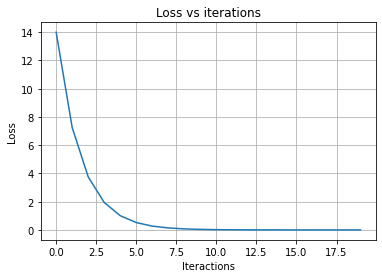

In [ ]:
import matplotlib.pyplot as plt

learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
loss = []

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    loss.append(J.item())
    print('J=', J)
    grad = J_fdiff(w, x, y)
    print('grad =',grad)
    w -= learning_rate * grad
    print('w =', w)

# Plote o gráfico da loss J pela iteração i
plt.plot(loss)
plt.title("Loss vs iterations")
plt.ylabel("Loss")
plt.xlabel("Iteractions")
plt.grid()

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


i = 0
J= tensor(14., grad_fn=<SumBackward0>)
grad = tensor([-28.])
w = tensor([1.2800], requires_grad=True)
i = 1
J= tensor(7.2576, grad_fn=<SumBackward0>)
grad = tensor([-20.1600])
w = tensor([1.4816], requires_grad=True)
i = 2
J= tensor(3.7623, grad_fn=<SumBackward0>)
grad = tensor([-14.5152])
w = tensor([1.6268], requires_grad=True)
i = 3
J= tensor(1.9504, grad_fn=<SumBackward0>)
grad = tensor([-10.4509])
w = tensor([1.7313], requires_grad=True)
i = 4
J= tensor(1.0111, grad_fn=<SumBackward0>)
grad = tensor([-7.5247])
w = tensor([1.8065], requires_grad=True)
i = 5
J= tensor(0.5241, grad_fn=<SumBackward0>)
grad = tensor([-5.4178])
w = tensor([1.8607], requires_grad=True)
i = 6
J= tensor(0.2717, grad_fn=<SumBackward0>)
grad = tensor([-3.9008])
w = tensor([1.8997], requires_grad=True)
i = 7
J= tensor(0.1409, grad_fn=<SumBackward0>)
grad = tensor([-2.8086])
w = tensor([1.9278], requires_grad=True)
i = 8
J= tensor(0.0730, grad_fn=<SumBackward0>)
grad = tensor([-2.0222])
w = tensor([1.9480

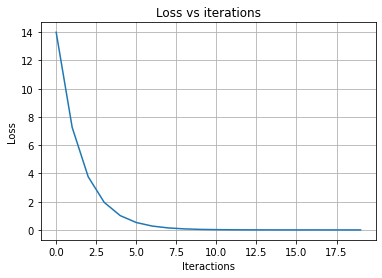

In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)
loss =[]

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    loss.append(J.item())
    print('J=', J)
    if w.grad: w.grad.zero_()
    J.backward()
    grad = w.grad
    print('grad =',grad)
    with torch.no_grad():
      w-= learning_rate * grad
    print('w =', w)

# Plote aqui a loss pela iteração
plt.plot(loss)
plt.title("Loss vs iterations")
plt.ylabel("Loss")
plt.xlabel("Iteractions")
plt.grid()

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

Resposta: Observando o calculo do gradiente por diferenças finitas percebemos que Δw não pode ser zero. Geralmente Δw é um número bem pequeno tendendo a zero, porém não deve ser tão pequeno ao ponto de a máquina representá-lo como zero.

##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) Sabendo que o custo é dado por $J=(x_i w - y_i)^2$, tendo em vista que é válido para o parâmetro w, é necessário executar a função N vezes para percorrer todo o vetor de parâmetros. Sabendo que a regra das diferenças finitas é a derivada da função de custo e possui ordem $2O(N) -> O(N)$, se executada N vezes temos $N*N -> O(N^2)$

b) Para calcular J o grafo é percorrido uma vez pelo forward propagation e depois é percorrido mais uma vez pelo backpropagation, resultando no custo $O(2*N) -> O(N)$

##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta: Assumindo que a probabilidade na primeira iteração seja uniforme, $1/k$, a formula da entropia pode ser descrita como:
$$L = - \sum_{j=0}^{K-1} y_j \log (1/k), $$
Levando em consideraçao que $y=1$ para j representando a classe do exemplo e sabendo que as classes possuem probabilidades equivalentes, a Loss pode ser definida como: $$L = log (k) $$
Considerando o Batch, temos:
$$L = (1/B)\sum_{i=0}^{B-1} \log k = \log k $$

Fim do notebook.